### Imports

In [26]:
from random import sample
import pywt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from CSIKit.tools.batch_graph import *
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd
import seaborn as sb
import re
import warnings
warnings.filterwarnings("ignore")
LIMIT = 5

### Lists of csv and pcap files

In [27]:
pcap_files = ["csi_tests_pcap/" + i for i in listdir('csi_tests_pcap')]
csv_files = ["csi_tests_csv/" + i for i in listdir('csi_tests_csv')]
pcap_files.sort(key=lambda x: (ord(x[-13])*10) + int(x[-7] + x[-6]) if x[-7].isdigit() else (ord(x[-12])*10) + int(x[-6]))
csv_files.sort(key=lambda x: (ord(x[-12])*10) + int(x[-6] + x[-5]) if x[-6].isdigit() else (ord(x[-11])*10) + int(x[-5]))

### Dict of csv file dataframes

In [28]:
dataframes = {}

for filename in csv_files:
    cur_df = pd.read_csv(filename, index_col=None, header=0)
    cur_df.columns = np.arange(0,len(cur_df.columns))
    dataframes[filename[14:]] = cur_df

### Visualization of file lengths

In [29]:
filesLen = pd.DataFrame(columns=["Name", "Length"])
idx = 0
lens = []

for filename in dataframes:
    lens.append(dataframes[filename].shape[0])
    filesLen.loc[idx] = [filename[:-7] if filename[-6].isdigit() else filename[:-6], dataframes[filename].shape[0]]
    idx = idx + 1

binsHeight, intervals = np.histogram(filesLen.Length.values, bins=50)
filesLen = filesLen.sort_values("Length")

y = []
for i in binsHeight:
    for j in range(i):
        y.append(j*0.03+0.017)

filesLen["Count"] = y

z = []
for i in range(len(intervals)-1):
    z.append((intervals[i]+intervals[i+1])/2)

x = []
for i in range(len(binsHeight)):
    for j in range(binsHeight[i]):
        x.append(z[i])

filesLen["Mid_intervals"] = x
filesLen

,Name,Length,Count,Mid_intervals
39,Hand_circle,20,0.017,24.1
40,Hand_circle,28,0.047,24.1
41,Hand_circle,59,0.017,56.9
35,Hand_circle,70,0.017,73.3
90,Hand_move_up,76,0.047,73.3
...,...,...,...,...
54,Falldown,381,0.017,384.9
8,Walking_along,394,0.017,393.1
53,Falldown,413,0.017,409.5
97,Hand_move_up,424,0.017,425.9


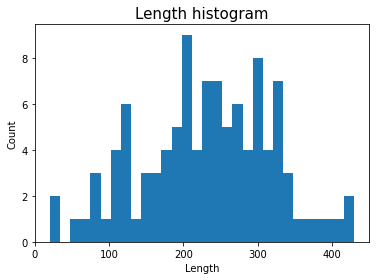

In [30]:
plt.hist(filesLen["Length"],bins=30)
plt.xlabel("Length", size = 10)
plt.ylabel("Count", size = 10)
plt.title("Length histogram", size = 15)
plt.show()

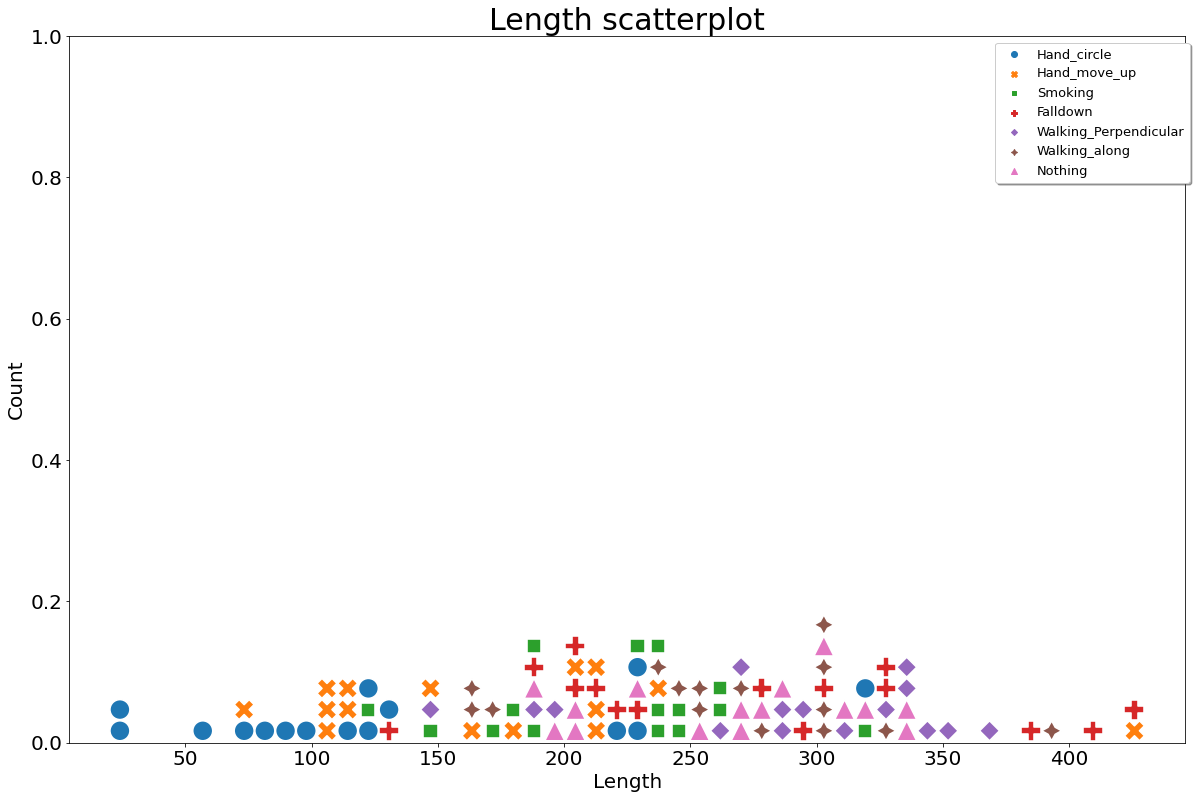

In [31]:
s = [400]*105
plt.figure(figsize=(20,13))
plt.xlabel("Length", size = 20)
plt.ylabel("Count", size = 20)
plt.title("Length scatterplot", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
scatter = sb.scatterplot(data=filesLen, x="Mid_intervals", y="Count", hue="Name", s=s, style="Name")

scatter.legend(fontsize = 13, bbox_to_anchor = (1.01, 1), shadow = True, )
plt.ylim((0, 1))
plt.show()

In [32]:
dataframes["Walking_along_12.csv"]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,29.566486,42.784106,32.504200,26.830470,26.522463,30.507663,57.728056,57.215435,57.552603,57.154100,...,59.755246,59.938527,59.965484,59.639091,59.444457,34.256972,18.325089,23.443923,23.117539,30.468852
1,34.353665,42.784106,56.212895,55.861753,55.508567,55.167165,54.975267,54.828107,54.659373,54.569624,...,57.490201,57.442899,57.418840,57.361622,57.237708,57.103552,56.919554,56.859673,56.752328,41.958997
2,30.103000,42.784106,31.222159,30.141003,27.730547,22.552725,57.000501,57.377014,56.614719,56.164545,...,60.034368,59.726735,59.447767,58.884115,59.465397,29.283959,31.287223,24.668676,20.374265,13.979400
3,38.813847,42.784106,55.538855,55.428976,55.300588,55.123241,54.890580,54.614160,54.292289,53.928815,...,57.106867,57.008983,56.950226,56.941039,56.852848,56.721542,56.545664,56.378588,56.213643,29.138139
4,19.030900,42.784106,24.099331,26.821451,21.335389,32.385479,57.457655,57.307056,56.677004,56.796931,...,59.689571,59.235222,59.411441,59.189734,58.597122,22.944662,22.278867,30.795430,29.206450,24.955443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,27.267272,42.784106,58.339295,58.252183,58.136537,58.072007,58.083548,58.200759,58.183665,58.147542,...,58.728325,58.647602,58.683111,58.515482,58.529707,58.604296,58.532418,58.544287,58.425406,36.250036
163,20.863598,42.784106,25.865873,26.989700,22.944662,20.000000,57.285567,57.069779,57.003896,57.228592,...,57.883360,58.112975,57.651237,57.532835,57.659664,18.325089,28.721563,20.969100,25.987905,13.979400
164,27.611758,42.784106,11.139434,15.682017,32.944662,32.612629,59.824594,59.898221,59.569307,59.978619,...,61.109188,60.761761,60.590986,60.509958,59.993855,12.304489,31.159432,21.367206,12.552725,17.242759
165,23.873898,42.784106,24.842998,29.894498,25.987905,26.857417,60.127782,59.694853,59.441795,59.970966,...,61.164118,60.709170,60.787591,60.446565,60.752410,28.603380,24.742163,23.010300,28.773713,22.671717


### Subcarrier correlation plots

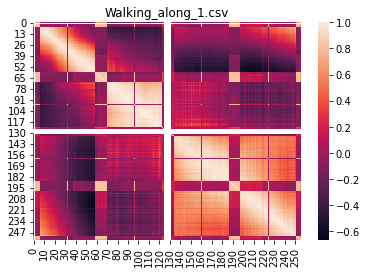

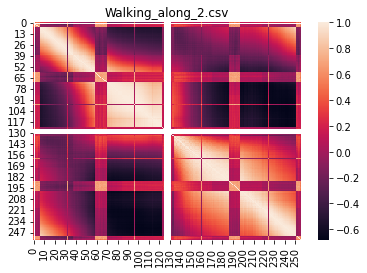

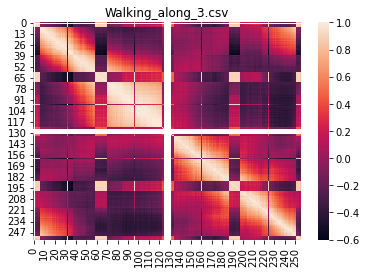

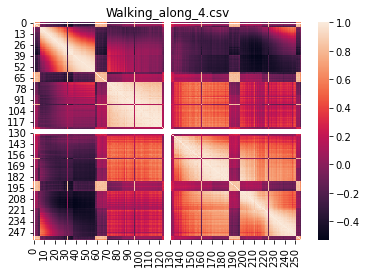

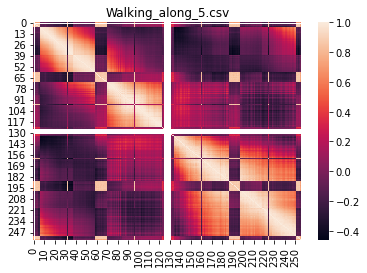

In [33]:
count = 0
for filename in dataframes:
    count = count + 1
    csi_matrix = dataframes[filename]
    plt.title(filename)
    sb.heatmap(csi_matrix.corr())
    plt.show()
    if count >= LIMIT:
        break

### Amplitude heatmaps

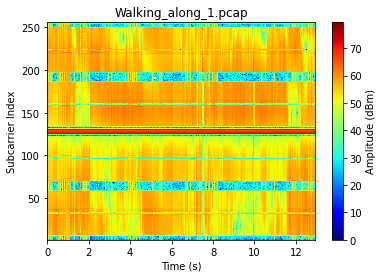

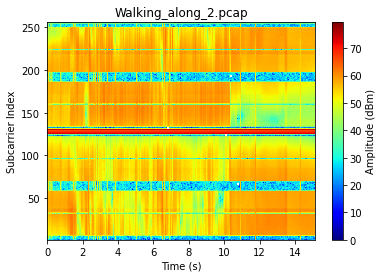

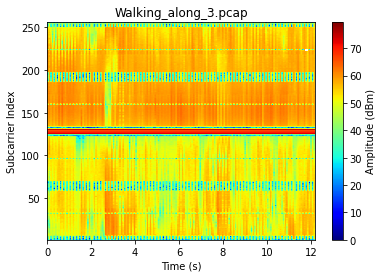

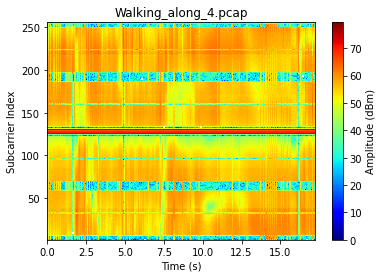

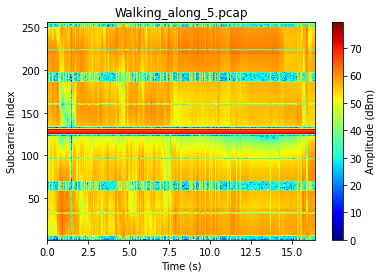

In [34]:
count = 0
for filename in pcap_files:
    count = count + 1
    bg = BatchGraph(filename)
    bg.heatmap()
    if count >= LIMIT:
        break

### Line plots of one subcarrier

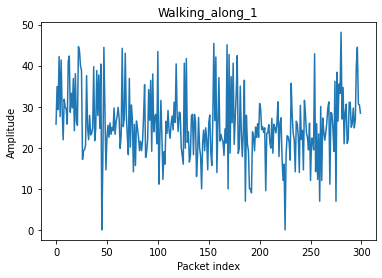

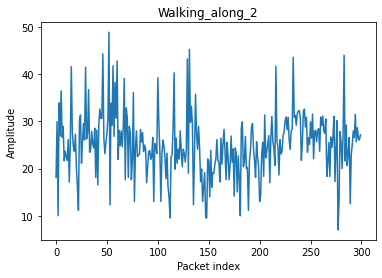

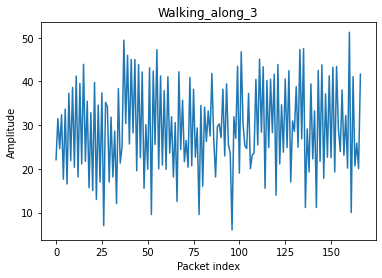

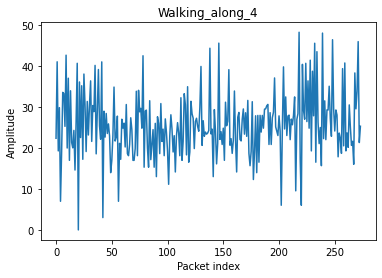

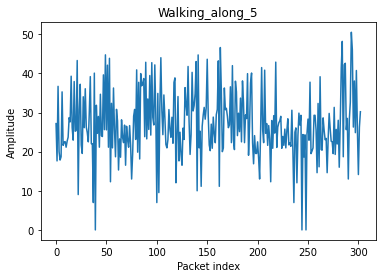

In [35]:
count = 0
for filename in dataframes:
    count = count + 1
    dataframes[filename][0].plot.line()
    plt.title(filename[:-4])
    plt.ylabel("Amplitude")
    plt.xlabel("Packet index")
    plt.show()
    if count >= LIMIT:
        break


### Line plots of 10 subcarriers

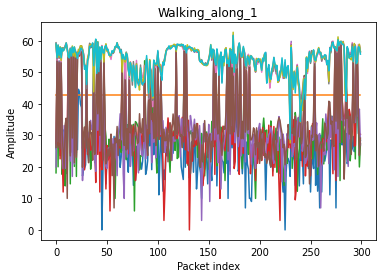

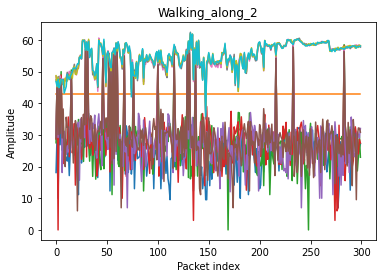

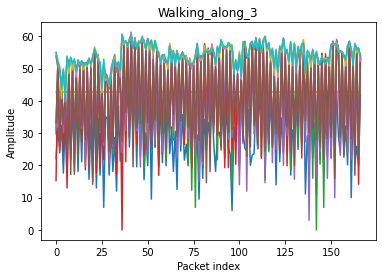

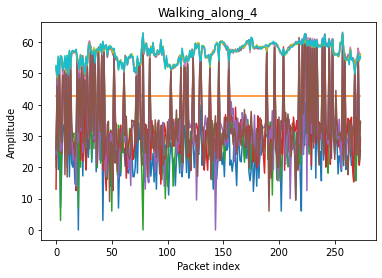

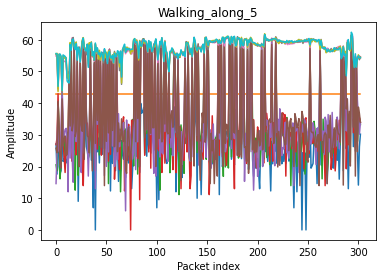

In [36]:
count = 0
for filename in dataframes:
    count = count + 1
    for i in range (10):
        dataframes[filename][i].plot.line()
    plt.title(filename[:-4])
    plt.ylabel("Amplitude")
    plt.xlabel("Packet index")
    plt.show()
    if count >= LIMIT:
        break


### Line plots of one packet

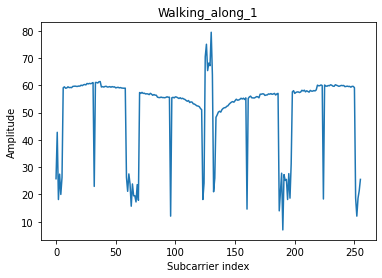

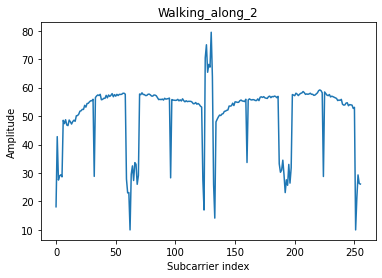

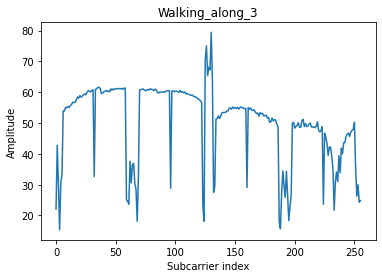

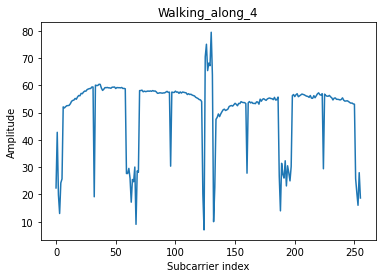

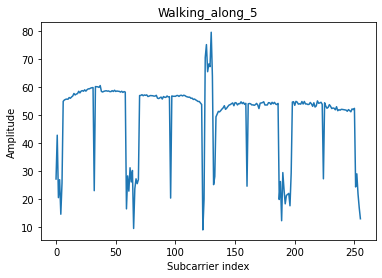

In [37]:
count = 0
for filename in dataframes:
    count = count + 1
    dataframes[filename].iloc[0].plot.line()
    plt.title(filename[:-4])
    plt.ylabel("Amplitude")
    plt.xlabel("Subcarrier index")
    plt.show()
    if count >= LIMIT:
        break


### Line plots of 10 packets

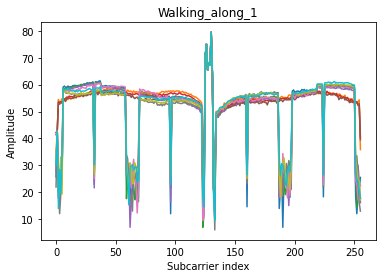

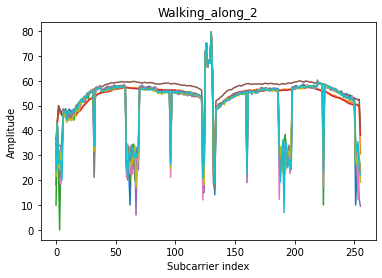

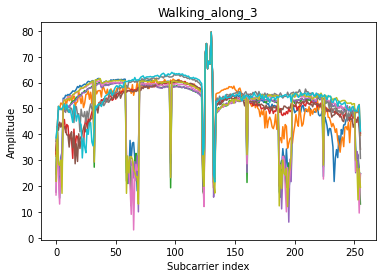

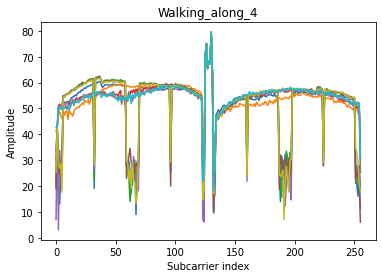

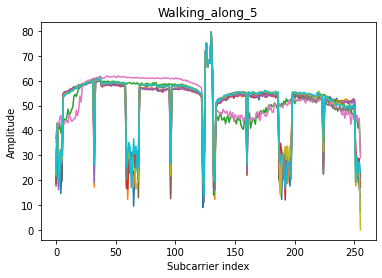

In [38]:
count = 0
for filename in dataframes:
    count = count + 1
    for i in range (10):
        dataframes[filename].iloc[i].plot.line()
    plt.title(filename[:-4])
    plt.ylabel("Amplitude")
    plt.xlabel("Subcarrier index")
    plt.show()
    if count >= LIMIT:
        break

### Removing none and inf

In [39]:
dataframes_clean = {}
for filename in dataframes:
    cur_df = dataframes[filename]
    cur_df.replace(-np.inf, np.nan, inplace=True)
    cur_df.replace(np.nan, cur_df.mean(), inplace=True)
    dataframes_clean[filename] = cur_df

### Data normalization

In [40]:
scaler = StandardScaler()
for filename in dataframes:
    cur_df = dataframes[filename]
    cur_df = pd.DataFrame(scaler.fit_transform(cur_df), columns = cur_df.columns)
    dataframes_clean[filename] = cur_df

### Train/test split (10:5)

In [41]:
actions_dict = {}
for filename in dataframes_clean.keys():
    action_name =  re.sub(r"_\d{1,10}.csv", "", filename)
    if actions_dict.get(action_name) == None:
        actions_dict[action_name] = set()
    actions_dict[action_name].add(filename)

In [42]:
train_list = []
test_list = []

for action_name in actions_dict:
    action_set = actions_dict[action_name]
    train_set = sample(action_set,10)
    test_set = action_set.difference(train_set)
    train_list.extend(list(train_set))
    test_list.extend(list(test_set))

### PCA implementation

In [43]:
dataframes_clean_train = []
for filename in dataframes_clean:
    if filename in train_list:
        dataframes_clean_train.append(dataframes_clean[filename])

df_concat = pd.concat(dataframes_clean_train)
df_concat

pca = PCA(0.83)
pca.fit(df_concat)
pca.explained_variance_ratio_

array([0.26234688, 0.2128038 , 0.16759311, 0.11353757, 0.06122904,
       0.02988354])

In [44]:
for filename in dataframes_clean:
    cur_df = dataframes_clean[filename]
    cur_df = pd.DataFrame(pca.transform(cur_df))
    dataframes_clean[filename] = cur_df

### Line plots of principal components

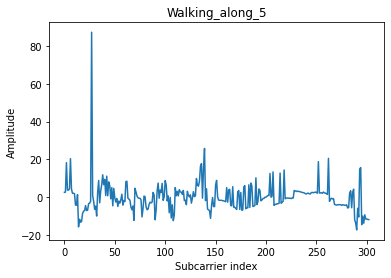

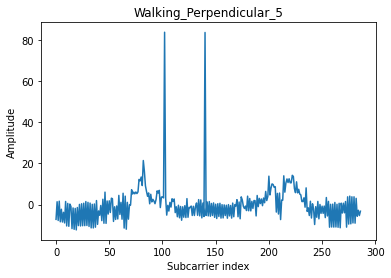

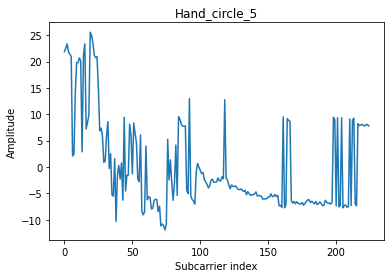

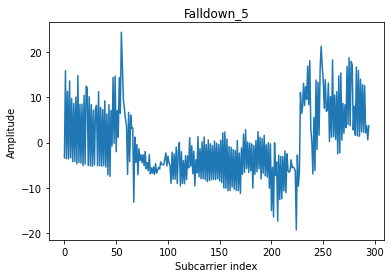

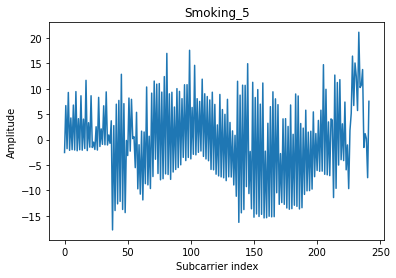

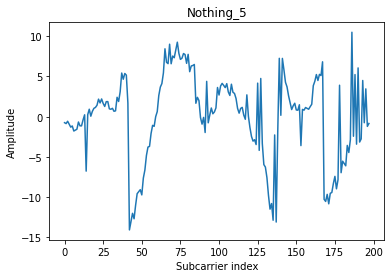

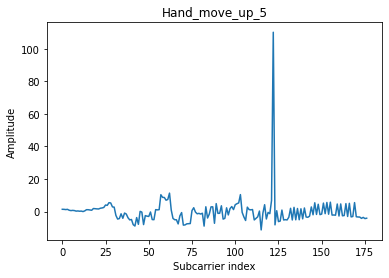

In [45]:
for i in range(7):
    filename = list(dataframes_clean.keys())[i*15+4]
    dataframes_clean[filename][0].plot.line()
    plt.title(filename[:-4])
    plt.ylabel("Amplitude")
    plt.xlabel("Subcarrier index")
    plt.show()

### Heatmap for nothing (cwt)

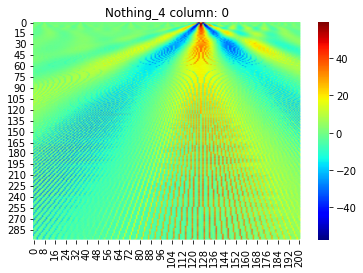

In [46]:
cur_df = dataframes_clean["Nothing_1.csv"]
scales = np.arange(1,300) # need to change
coef,freqs = pywt.cwt(cur_df[0],scales,wavelet='morl')
sb.heatmap(coef, cmap='jet', shading='gouraud')
plt.title("Nothing_4" + " column: " + str(0))
plt.show()

### CWT implementation

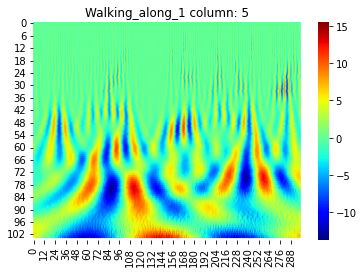

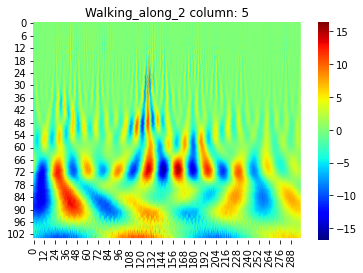

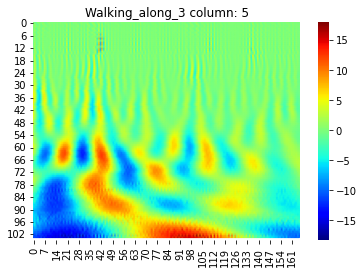

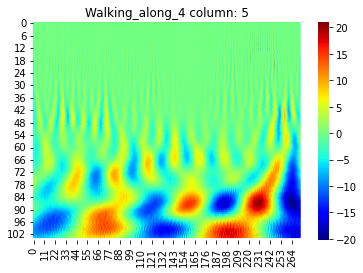

In [47]:
cwt_matrixes = {}
count = 0
for filename in dataframes_clean:
    count = count + 1
    cur_df = dataframes_clean[filename]
    cur_matrix = None
    for column in cur_df.columns:
        window_size = 50
        N = 7
        L = 15
        scales = [2 ** (n + (l / L)) for n in range(N) for l in range(L)]
        coef,freqs = pywt.cwt(cur_df[column],scales,wavelet='morl')
        if type(cur_matrix) == type(None):
            cur_matrix = coef
        else:
            cur_matrix = cur_matrix + coef
    cwt_matrixes[filename] = cur_matrix
    if count < LIMIT:
        sb.heatmap(coef, cmap='jet', shading='gouraud')
        plt.title(filename[:-4] + " column: " + str(column))
        plt.show()

In [48]:
labels_dict = {"Falldown": 1, "Hand_circle": 2, "Hand_move_up": 3, "Nothing":4, "Smoking":5,
              "Walking_along": 6, "Smoking":7 , "Walking_Perpendicular":8}

In [49]:
delete_list = []
max_size = 430
extender = pd.DataFrame(cwt_matrixes["Nothing_9.csv"])
cwt_df_train = None
cwt_df_test = None

train_indx = 1
test_indx = 1

cur = 0
for filename in cwt_matrixes:
    cur_df = pd.DataFrame(cwt_matrixes[filename])
    cur_size = cur_df.shape[1]

    print(cur)
    cur = cur + 1

    if cur_size < 96:
        delete_list.append(filename)
    else:
        for i in range(max_size - cur_size):
            cur_df[cur_size + i] = extender[i]
        cur_df.to_numpy().flatten()
        if filename in train_list:
            if type(cwt_df_train) == type(None):
                cwt_df_train = pd.DataFrame(columns=list(range((cur_df.shape[0] * cur_df.shape[1]) + 1)))
            label = re.sub(r"_\d{1,10}.csv", "", filename)
            label = labels_dict[label]
            cwt_df_train.loc[train_indx] =  np.append(cur_df.to_numpy().flatten(),label)
            train_indx = train_indx + 1
        else:
            if type(cwt_df_test) == type(None):
                cwt_df_test = pd.DataFrame(columns=list(range((cur_df.shape[0] * cur_df.shape[1]) + 1)))
            label = re.sub(r"_\d{1,10}.csv", "", filename)
            label = re.sub(r"_\d{1,10}.csv", "", filename)
            label = labels_dict[label]
            cwt_df_test.loc[test_indx] =  np.append(cur_df.to_numpy().flatten(),label)
            test_indx = test_indx + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


### Saving train and test csv

In [50]:
cwt_df_test.to_csv("concat_csv/cwt_df_test.csv", index=False)
cwt_df_train.to_csv("concat_csv/cwt_df_train.csv", index=False)